_Aprendizaje Automático_

_Máster Universitario en Inteligencia Artificial_

# Laboratorio: Regresión lineal y árboles de decisión para tareas de regresión


## Objetivos

Mediante esta actividad se pretende que ponga en práctica los pasos para la resolución de un problema de machine learning, el tratamiento de datos y la creación de modelos basados en regresión lineal y árboles de decisión. El objetivo es comprender de forma práctica con un problema determinado las diferencias que existen a la hora de entrenar los diferentes modelos.

- Iniciarse en el Análisis Exploratorio de Datos (EDA) para los problemas de Machine Learning.
- Entender y aplicar los conceptos de la Regresión Lineal Múltiple a un problema de regresión.
- Entender y aplicar los conceptos de Árboles de Decisión a un problema de regresión.
- Evaluar y analizar los resultados de los clasificadores.
- Investigar la aplicación de los modelos de clasificación a problemas reales.


## Descripción de la actividad

Debes completar los espacios indicados en el notebook con el código solicitado y la respuesta, en función de lo que se solicite. Ten encuenta que las celdas vacías indican cuántas líneas debe ocupar la respuesta, por lo general no más de una línea.

El conjunto de datos con el que vamos a trabajar se encuentra en el siguiente enlace: https://archive.ics.uci.edu/dataset/360/air+quality

Se trata de un dataset con un conjunto de datos sobre calidad del aire. El conjunto de datos contiene 9358 instancias de respuestas promediadas por hora de una matriz de 5 sensores químicos de óxido de metal integrados en un dispositivo multisensor químico de calidad del aire. El dispositivo estaba ubicado en un área significativamente contaminada, al nivel de la carretera, dentro de una ciudad italiana. Los datos se registraron desde marzo de 2004 hasta febrero de 2005 (un año).

El objetivo de la regresión será predecir la calidad del aire para un determinado día.

### Tareas que se deben realizar

- Análisis descriptivo de los datos:
   - Debe completarse el código solicitado y responder a las preguntas. Todo ello en el notebook dado como base.
- Regresión:
  - Debe completarse el código solicitado y responder a las preguntas. Todo ello en el notebook dado como base.
- Investigación:
  - Buscar un artículo científico (https://scholar.google.es/) con un caso de uso de regresión empleando una de las dos técnicas (o ambas) vistas en la actividad. Los artículos deben estar en revistas científicas, y deben ser posteriores a 2015. No debe utilizar técnicas de Deep Learning.
  - Para el artículo indicar:
    - Objetivo: cuál es el objetivo de la investigación, es decir a qué problema real está aplicando la regresión.
    - Cómo utilizan las técnicas de regresión, si realizan alguna adaptación de los algoritmos indicarse.
    - Principales resultados de la aplicación y de la investigación.


### Análisis descriptivo de los datos
A continuación vas a encontrar una serie de preguntas que tendrás que responder. Para responder tendrás que escribir (y ejecutar) una (o más de una) línea de código, y a continuación indicar la respuesta en la celda indicada.

In [148]:
## cargar el dataset

In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd

df = pd.read_csv('C:/Users/jmesc/Documents/Universidad UNIR/Tecnicas de Aprendizaje Automatico/Actividades/actividad 1/ACTIVIDAD 1 NEW/AirQualityUCI.csv', delimiter=';')

In [3]:
## ¿cuántas instancias tiene el dataset?
df.shape

(9471, 17)

17 Columnas y 9471 filas

In [4]:
## ¿cuál es el tipo de datos de cada una de las columnas?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


Si vais a la página de donde se obtiene el data set, ahi viene toda la informacion que se pedia en esta pregunta.

In [305]:
## ¿cuántas columnas categóricas hay? ¿y cuántas continuas?

Si vais a la página de donde se obtiene el data set, ahi viene toda la informacion que se pedia en esta pregunta. .

In [308]:
## ¿existen valores nulos en el dataset?
df.isnull()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
9467,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
9468,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
9469,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


La respuesta a esta sentencia es que no hay nulos, porque lo dicen el dataset  pero más adelante veremos que sí hay valores perdidos. Pero si se indaga algo en la informacion que se da, se indica que los valores faltantes son dados como un valor "-200". Asi que hay que eliminar esos valores.

In [311]:
cantidad_200 = (df == -200).sum()
print(cantidad_200)

Date                0
Time                0
CO(GT)              0
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)            0
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                   0
RH                  0
AH                  0
Unnamed: 15         0
Unnamed: 16         0
dtype: int64


Pero puede pasar que por algun error carguen columnas con valores nuelos. En nuestro caso cargan dos columnas llamas Unnamed: 15 y Unnamed: 16. Esto puede pasar por algun error interno en python. Simplemente las eliminais, con la siguiente linea de codigo.

In [314]:
## Estas son las lineas de codigo a usar
df = df.drop(columns=['Unnamed: 15', 'Unnamed: 16'])

# ADEMAS ELIMINAMOS LA "Date" Y "Time" YA QUE NO VAMOS A PREDECIR EL CONTAMINANTE POR DIA Y POR HORA
df = df.drop(columns=['Date', 'Time'], axis=1)
df.head(10)

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"
5,"1,2",1197.0,38.0,"4,7",750.0,89.0,1337.0,96.0,1393.0,949.0,"11,2","59,2","0,7848"
6,"1,2",1185.0,31.0,"3,6",690.0,62.0,1462.0,77.0,1333.0,733.0,"11,3","56,8","0,7603"
7,1,1136.0,31.0,"3,3",672.0,62.0,1453.0,76.0,1333.0,730.0,"10,7","60,0","0,7702"
8,"0,9",1094.0,24.0,"2,3",609.0,45.0,1579.0,60.0,1276.0,620.0,"10,7","59,7","0,7648"
9,"0,6",1010.0,19.0,"1,7",561.0,-200.0,1705.0,-200.0,1235.0,501.0,"10,3","60,2","0,7517"


In [316]:
## CONVERTIMOS LAS COMAS EN PUNTOS EN LAS COLUMNAS QUE SEA NECESARIO
df['CO(GT)'] = df['CO(GT)'].str.replace(',', '.').astype(float)
df['C6H6(GT)'] = df['C6H6(GT)'].str.replace(',', '.').astype(float)
df['T'] = df['T'].str.replace(',', '.').astype(float)
df['RH'] = df['RH'].str.replace(',', '.').astype(float)
df['AH'] = df['AH'].str.replace(',', '.').astype(float)
df.head(10)

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
5,1.2,1197.0,38.0,4.7,750.0,89.0,1337.0,96.0,1393.0,949.0,11.2,59.2,0.7848
6,1.2,1185.0,31.0,3.6,690.0,62.0,1462.0,77.0,1333.0,733.0,11.3,56.8,0.7603
7,1.0,1136.0,31.0,3.3,672.0,62.0,1453.0,76.0,1333.0,730.0,10.7,60.0,0.7702
8,0.9,1094.0,24.0,2.3,609.0,45.0,1579.0,60.0,1276.0,620.0,10.7,59.7,0.7648
9,0.6,1010.0,19.0,1.7,561.0,-200.0,1705.0,-200.0,1235.0,501.0,10.3,60.2,0.7517


In [318]:
## REEMPLAZAMOS EL VALORE -200 POR NaN Y ESTE LO SUSTITUIMOS POR EL VALORE MEDIO DE CADA COLUMNA
df.replace(to_replace= -200, value= np.NaN, inplace= True)

for i in df.columns:
    df[i] = df[i].fillna(df[i].mean())

In [320]:
## ¿cuál es la variable respuesta?¿de qué tipo es?

Esta respues es algo abierta. Lo que se buscaba es que indagarais en la informacion que se proporciona en la pagina de donde se descarga el dataset asi como del articulo del que se obtiene el data set. Originalmente el artículo toma como variable respuesta NMHC(GT). Pero por ejemplo en la explicacion que di en clase cogí la vabiable NOx(GT).

<Axes: ylabel='Frequency'>

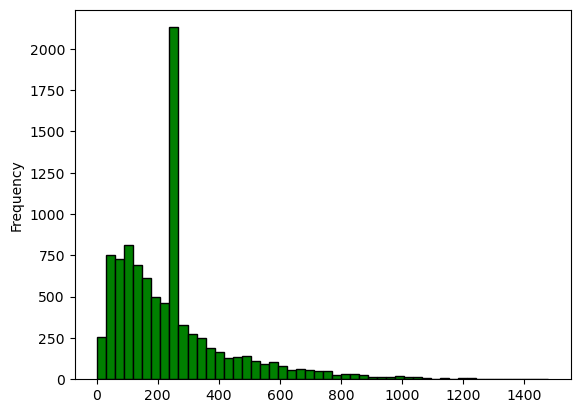

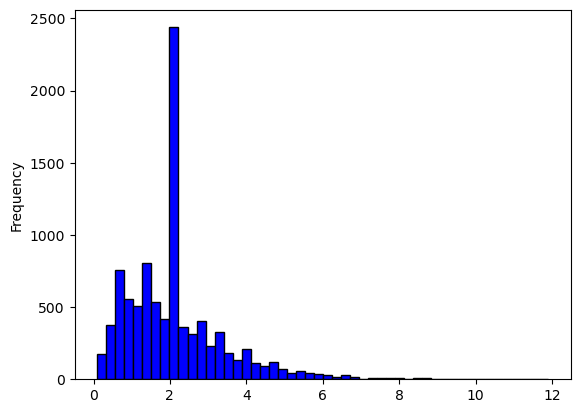

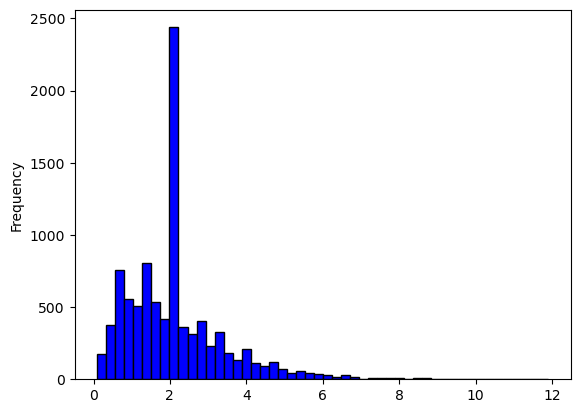

In [323]:
## Si te fijas en los estadísticos del dataset, ¿cómo es la distribución de las variables, CO, NOx y NO2? 

import matplotlib.pyplot as plt

plt.figure('NOx(GT)')
df['NOx(GT)'].plot.hist(bins=50, color='green', label='Histograma de NOx', edgecolor='black')

plt.figure('CO(GT)')
df['CO(GT)'].plot.hist(bins=50, color='blue', label='Histograma de CO', edgecolor='black')

plt.figure('NO2(GT)')
df['CO(GT)'].plot.hist(bins=50, color='blue', label='Histograma de NO2', edgecolor='black')

¿Estas variables muestran alguna distribución especial?¿Tienen datos faltantes?¿y datos anómalos?

En un principio ya hemos elimando todo aquello que puede perjudicar a nuestros modelo como los datos faltantes o los outliers. Los valores -200 eran considerados como datos faltantes, porque asi nos lo indicaban pero podian haberse considerado como outliers. 

In [327]:
## ¿cómo son las correlaciones entre las variables del dataset?

<Axes: >

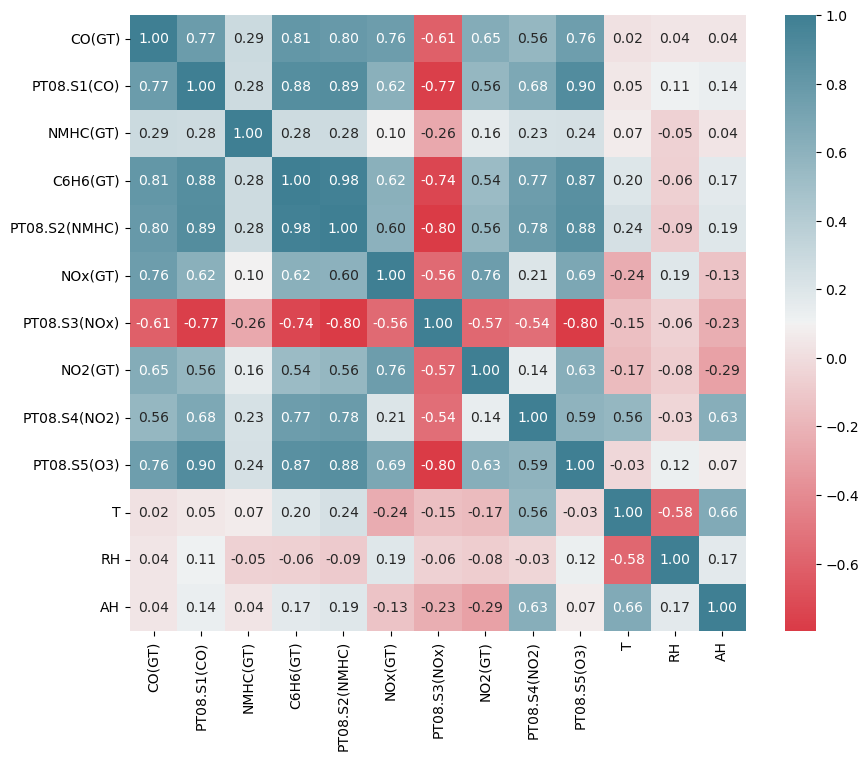

In [329]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df)
datos = pd.DataFrame(scaler.transform(df), columns = df.columns)
datos.head()


#CALCULAMOS LAS CORRELACIONES ENTRE VARIABLES
import seaborn as sns

correlation_matrix = datos.corr(method="pearson")

f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation_matrix,
    annot=True, 
    fmt=".2f",
    cmap=sns.diverging_palette(10, 220, as_cmap=True),
    square=True, 
    ax=ax)

Particularmente a mi, cuando ya tengo los datos limpios y antes de hacer las correlaciones me gusta hacer una normalizacion de los datos entre 0 y 1 mediante la funcion de python MinMaxScaler.

In [332]:
## ¿qué tres variables son las más correlacionadas con la variable objetivo?

La variable objetivo escogida era NOx(GT), pues me centro en la correlacion de las demas variables con respecto a ella.

<Axes: >

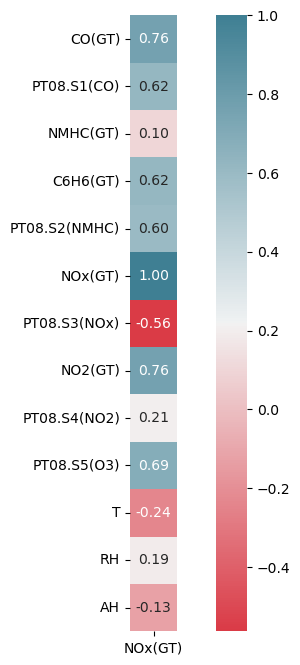

In [335]:
f, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(pd.DataFrame(correlation_matrix["NOx(GT)"]),
    annot=True, 
    fmt=".2f",
    cmap=sns.diverging_palette(10, 220, as_cmap=True),
    square=True, 
    ax=ax)

In [337]:
## ¿existe alguna variable que no tenga correlación?

Estas son las variables que su coeficiente de correlaciones muy cercano a cero. Como som: NMHC(GT), AH y RH. Pero vuestra respuesta depende de la variable objetivo escogida.

En base al EDA realizado, ¿qué suposiciones se pueden hacer sobre los datos?¿qué conclusiones extraes para implementar el modelo predictivo?

Atendiendo al EDA realizado y a la varibale objetivo escogida, podemos observar que:

- NMHC(GT), AH y RH son las variables con menor interes para mi prediccion debido a su baja correlacion
- NO2(GT) y CO(GT) son las de mayor interes desarrollar un modelo para predecir los valores de NOx(GT).

### Regresión

Para llevar a cabo la tarea de regresión deseada se pretender hacer una comparativa de varios modelos. Unos usarán el algortimo de regresión lineal, y otros realizarán la predicción haciendo uso de árboles de decisión.

Para los primeros modelos hay que usar el módulo https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html 

El algortimo de Regresión Lineal necesita saber cuáles son las variables que va a tener en cuenta para realizar la estimación.

El primero modelo que se debe construir usará una regresión lineal simple. Para ello sigue los siguientes pasos.

Antes de empezar con la implementación de los modelos hace falta realizar una transformación de datos, escalarlos.

Los datos ya ha sido escalados previamente antes de realizar la matrix de correlacion, por lo que no tengo que hacerlo de nuevo.

In [346]:
# escoger la variable que a partir del EDA realizado, consideres que mejor va a realizar la predicción

In [348]:
# separar datos de entrenamiento y test

from sklearn.model_selection import train_test_split

# SACO LA VARIABLE OBJETIVOS, VARIABLE QUE QUIERO PREDECIR DE LAS VARIABLES CARACTERISTICAS
# 'X' INDICA MIS VARIABLES CARACTERISTCIAS
X = datos.drop(columns = ['NOx(GT)']).copy()

# 'Y' INDICA MI VARIABLE OBJETIVOS, VARIABLE A PREDECIR
y = datos['NOx(GT)']

# SEPARO LOS DATOS EN ENTRENAMIENTO Y TEST. IDEALMENTE SE DEBERIAN SEPARAR EN ENTRENAMIENTO, VALIDACION Y TEST, PERO COMO TENGO POCOS DATOS SOLO
# SEPARAMOS LOS DATOS EN ENTRENAMIENTO Y TEST
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [350]:
# VARIABLES CARACTERISTICAS A USAR
X_train = X_train['CO(GT)']
X_test = X_test['CO(GT)']

X_train = X_train.values.reshape((-1, 1))
X_test = X_test.values.reshape((-1, 1))

In [352]:
# entrena el modelo con los datos de entrenamiento

In [354]:
# Creamos un objeto de Regresion lineal
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [356]:
# ¿cuáles son los valores aprendidos por el modelo para los parámetros?

In [358]:
regr.coef_

array([0.89181914])

In [360]:
regr.intercept_

0.010237663657012619

Explica qué indican estos parámetros

EL MODELO ES UN MODELO DE REGRESION LINEAL DE UNA SOLA VARIBALE ES DECIR:

y = mX + b

EL PARAMETRO 'regr.coef_' INDICA LA PENDIENDTE DE LA REGRESION LINEAL: m = regr.coef_

EL PARAMETRO 'regr.intercept_' INDICA EL PUNTO DE CORTE: b = regr.intercept_

In [364]:
# realiza las predicciones para el conjunto de datos de test

In [366]:
y_pred_lin = regr.predict(X_test)
y_pred_lin

array([0.42591608, 0.16139345, 0.16895124, ..., 0.16538015, 0.04802661,
       0.15383566])

In [368]:
# Ahora es necesario evaluar el modelo. ¿Qué métrica es mejor utilizar en este caso?
from sklearn.metrics import root_mean_squared_error, r2_score
rmse = root_mean_squared_error(y_test,y_pred_lin)   
R2 = r2_score(y_test,y_pred_lin)

print('Root Mean Square Error:', rmse)
print('R2:', R2)

Root Mean Square Error: 0.0869848260333453
R2: 0.5468675276242225


Para un modelo de regresion las mejores metricas para medir la precision de mi modelo son: RMSE y R2.
La primera me proporciona el erroe en la medion. La segunda me proporciona una medida de la linealidad de mi modelo.

In [371]:
# ¿Qué error tiene el modelo? Explícalo.

El R2 nos ondica que el 58% de los datos son explicables con el modelo, teniendo un error del 42%. El RMSE no porporciona la distancia media entre la prediccion obtenida y el valor real.

Ahora debes entrenar un segundo modelo que haga uso de una regresión lineal múltiple con todas las variables del dataset. Después de entrenar, realiza las predicciones para este segundo modelo.

In [374]:
X = datos.drop(columns = ['NOx(GT)']).copy()
y = datos['NOx(GT)']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [376]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred_mul = regr.predict(X_test)

¿Qué error tiene este modelo?¿Es mejor o peor que el anterior?

_indica aquí tu respuesta_

In [378]:
rmse = root_mean_squared_error(y_test,y_pred_mul)   
R2 = r2_score(y_test,y_pred_mul)

print('Root Mean Square Error:', rmse)
print('R2:', R2)

Root Mean Square Error: 0.05506868076155959
R2: 0.8183867491368345


¿Qué error tiene este modelo?¿Es mejor o peor que el anterior?

Atendiendo a la comparativa de metrica, se obtiene una mejora sustancial. El modelo lineal multiple es mucho mejor que el modelo lineal simple.

| Modelo | RMSE | R2 |
|--------------|--------------|--------------|
| Lineal       | 0.086       |    0.54     |
| Multilineal       | 0.055      | 0.81       |

                



#### Regresión con árboles de decisión

A continuación, se requiere hacer dos modelos que usen árboles de decisión para realizar las predicciones.

Para los árboles de decisión, al ser una tarea de regresión, hay que usar el módulo https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

El algortimo de DTRegressor necesitar ajustar una serie de hiperparámetros para realizar las predicciones. La implementación de sklearn nos da mucha flexibilidad para nuestros modelos. En general, para los problemas más comunes de regresión, nos tenemos que preocupar de los siguientes hiperparámetros:

* criterion
* splitter
* max_depth
* min_samples_split
* min_samples_leaf
* max_features

Indica qué son cada uno de estos hiperparámetros

_indica aquí tu respuesta_

Además de los hiperparámetros que acabas de descubrir, la implementación de sklearn tiene el hiperparámetro min_impurity_decrease

¿Qué indica ese parámetro? ¿Para qué puede ser útil?

_indica aquí tu respuesta_


### EN ESTE CASO ES EXPLICAR LOS DIFERENTES PARAMETROS 

Entrena un modelo de árboles de decisión donde, el criterio para realizar las particiones sea _poisson_, la profundidad máxima de los árboles debe ser 10, el número mínimo de ejemplos para realizar una partición debe ser 10, el número mínimo de ejemplos para considerarlo una hoja debe ser 2, y el número máximo de características deben ser todas.

In [422]:
X = datos.drop(columns = ['NOx(GT)']).copy()
y = datos['NOx(GT)']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [424]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(criterion='poisson', max_depth=10, min_samples_split=10, min_samples_leaf=2,random_state=0)
tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=10, min_samples_leaf=2,
                      min_samples_split=10, random_state=0)

In [426]:
y_pred = tree.predict(X_test)

Calcula MAE, R2 y RMSLE

In [428]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import root_mean_squared_log_error

mae = mean_absolute_error(y_test, y_pred)
print('MAE: %.2f' % mae)

r2 = r2_score(y_test, y_pred)
print("R2: %.2f" % r2)

rmsle = root_mean_squared_log_error(y_test, y_pred)
print('RMSLE: %.2f' % rmsle)

MAE: 0.03
R2: 0.87
RMSLE: 0.04


¿Existe overfitting? Indica qué debes hacer para comprobar si hay overfitting.

In [430]:
tree = DecisionTreeRegressor(criterion='poisson', max_depth=10, min_samples_split=10, min_samples_leaf=2,random_state=0)
tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)

In [432]:
mae_t = mean_absolute_error(y_train, y_train_pred)
print('MAE: %.2f' % mae_t)

r2_t = r2_score(y_train, y_train_pred)
print("R2: %.2f" % r2_t)

rmsle_t = root_mean_squared_log_error(y_train, y_train_pred)
print('RMSLE: %.2f' % rmsle_t)

MAE: 0.02
R2: 0.95
RMSLE: 0.02


El modelo presenta overfitting. El r2 para los datos de entrenamiento es 0.95, mientras que para los datos de test es 0.87, vemos un claro overfitting, donde el modelo se ha ajustado demasioado a los datos de entrenamiento.

¿Este modelo es mejor, peor o igual que los de regresión lineal simple y múltiple? Razona tu respuesta.

_indica aquí tu respuesta_

**Comparativa**

En base al EDA realizado, a las decisiones tomadas sobre los datos e hiperparámetros y a las características computacionales de tu equipo. ¿Qué modelo obtiene mejores resultados de regresión?

Si atendemos a las metricas, el arbol de regresion tiene  mejores resultados pero debe tenerse en cuenta su efecto de overfitting.
| Modelo | RMSE | R2 |
|--------------|--------------|--------------|
| Lineal       | 0.086       |    0.54     |
| Multilineal       | 0.055      | 0.81       |
| Arbol Reg.       | 0.02      | 0.87       |



## Investigación

Buscar un artículo científico (https://scholar.google.es/) con un caso de uso de regresión empleando una de las dos técnicas (o ambas) vistas en la actividad. Los artículos deben estar en revistas científicas, y deben ser posteriores a 2015. No debe utilizar técnicas de Deep Learning.

_introduce aquí la referencia APA del artículo_

título, autores, revista, año de publicación

Objetivo: cuál es el objetivo de la investigación, es decir a qué problema real está aplicando la regresión. Técnicas de regresión empleadas y si realiza alguna adaptación. Principales resultados de la aplicación y de la investigación.